In [1]:
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
import warnings

warnings.filterwarnings("ignore")
FORCE = False

# AppVoCAI Data Quality Assessment
It's well established, the performance, reliability, accuracy, and validity of AI and machine learning models is limited by the quality and integrity of the training data. Systematic analysis of the data quality is an essential precursor to downstream cleaning, analysis and modeling. In this section, we evaluate the quality of the AppVoCAI dataset along eight dimensions:

1. **Completeness**: The degree to which all required data values are present. The completeness metric is defined as:
$$X_{Completeness}=\frac{N_c}{N}$$ 
where $N_c$ is the number of complete rows, and $N$ is the total number of rows. 

2. **Validity**: Validity refers to the degree to which the data reflect valid data. In this context, we consider the validity of rating values in [1,5], as well as review length outliers:
$$X_{Validity}=\frac{N_r}{N}*w_1 + \frac{N_o}{N}*w_2$$ 
where $N_r$ are the number of observations for which the rating is valid, $N_o$ are the non-outlier rows for review length, $N$ is the total number of observations, and $w_1=0.7$ and $w_2=0.3$ are weights assigned to each component based upon their importance to the analysis. 

3. **Uniqueness**: Uniqueness in the dataset is defined as:
$$X_{Uniqueness}=\frac{N_r}{N}*w_1+\frac{N_{id}}{N}*w_2$$
where $N_r$ is the number of unique reviews by app_id, $N_{id}$ is the number of unique review identifiers, $N$ is the total number of observations, and $w_1=0.3$, and $w_2=0.7$ are weights reflecting the importance of each component to the integrity of the dataset.  

4. **Balance**: The degree to which sentiments are in balance across the dataset. Balance is computed as:
$$X_{Balance}=1-\frac{\sum_{i=1}^N|x_i-\bar{x}|}{N}$$
where $x_i$ is the sentiment for the $i^{th}$ observation, $\bar{x}$ is the average sentiment for the dataset, and $N$ is the total number of observations.

5. **Accuracy**: Accuracy reflects the degree to which the data represents real-world phenomena it is intended to describe. Noise in text, such as extraneous characters, introduces distortions that can affect analysis and modeling performance. We define the accuracy metric as:
$$X_{Accuracy}=1-\frac{N_n}{N}$$

where $N_n$ is the number of rows flagged for noise and $N$ is the total number of rows in the dataset. 

6. **Data Privacy**: Personally Identifiable Information (PII) in datasets raises a number of ethical, privacy, and legal concerns. Here, we measure the degree to which the data are free of PII such as URLs, phone numbers, and email addresses. 
$$X_{Data Privacy}=1-\frac{N_p}{N}$$
where $N_p$ is the number of observations containing PII, and $N$ is the number of observations in the dataset. 

7. **Interpretability**:  The degree to which data are in an appropriate language. Non-english app names and app reviews are flagged in the dataset, revealing separate measures of interpretability which are averaged as follows:
$$X_{Interpretability}=1-\frac{N_{ne}}{N}$$ 

where $N_{ne}$ is the number of rows with non-English app names or review text, and $N$ is the total number of observations.

8. **Text Quality**: Our text quality metric is a weighted sum of syntactic complexity measures and a perplexity-based coherence score to arrive at a quality score for each rating {ref}`appendix:tqa`. 

## Overall Data Quality Score
The overall data quality score is a weighted sum of the data quality dimensions, calculated as follows:

$$
\text{Overall Quality Score} = 0.10 \times X_{\text{Completeness}} + 0.15 \times X_{\text{Validity}} + 0.10 \times X_{\text{Uniqueness}} + 0.10 \times X_{\text{Balance}} + 0.15 \times X_{\text{Accuracy}} + 0.05 \times X_{\text{Data Privacy}} + 0.05 \times X_{\text{Interpretability}} + 0.30 \times X_{\text{Text Quality}}
$$

### Justification for Weights
1. **Completeness (10%)**: Ensures that a sufficient proportion of data values are present. While essential, its impact is balanced with other dimensions.
2. **Validity (15%)**: Critical for ensuring the integrity of numerical values like ratings and identifying outliers in review lengths, influencing analysis reliability.
3. **Uniqueness (10%)**: Maintains data integrity by verifying the distinctiveness of reviews and identifiers, though not as heavily weighted as other metrics.
4. **Balance (10%)**: Important for maintaining an unbiased distribution of sentiments across the dataset, reducing the risk of skewed analytical insights.
5. **Accuracy (15%)**: Essential for minimizing distortions caused by noise or extraneous characters in the text, preserving the fidelity of the data.
6. **Data Privacy (5%)**: Measures the presence of Personally Identifiable Information (PII) and ensures compliance with privacy standards. Although vital, it has a lower weight due to the focus on textual analysis.
7. **Interpretability (5%)**: Assesses the linguistic appropriateness of the data, such as ensuring reviews are in the correct language. This metric is important but weighted lower in comparison.
8. **Text Quality (30%)**: Given the focus on natural language processing, Text Quality receives the highest weight. This dimension emphasizes lexical richness, syntactical diversity, and coherence, which are paramount for accurately analyzing and interpreting complex textual data.



In [2]:
from discover.app.dqa import DQA
from discover.container import DiscoverContainer

## Dependency Container

In [3]:
container = DiscoverContainer()
container.init_resources()
container.wire(
    modules=[
        "discover.app.base",
    ],
)

In [ ]:
dqa = DQA()

## Data Quality Analysis

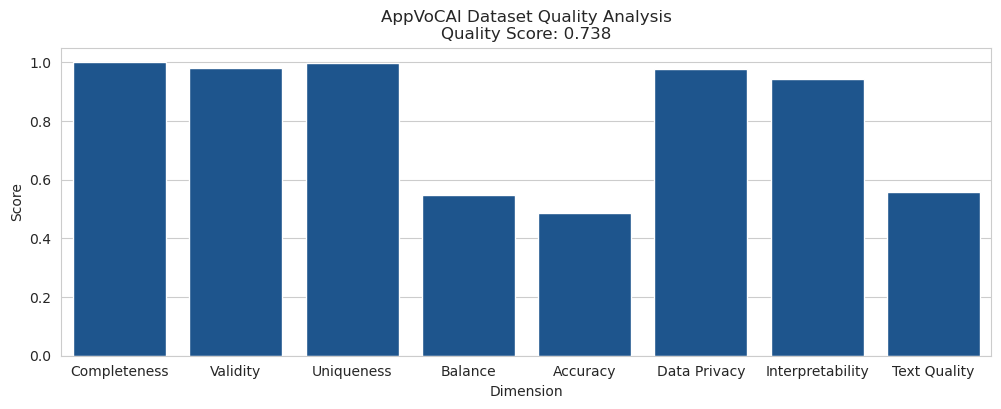

In [5]:
dqa.plot_quality()

## Initial Impressions 
1. **High Scores**: 
   - **Completeness**, **Validity**, and **Uniqueness** all score close to 1.0, indicating that these aspects of the dataset are nearly optimal. This suggests that the data is well-populated, valid according to the established criteria, and that there is a high degree of uniqueness in identifiers and relevant content. 
  
2. **Moderate Scores**: 
   - **Balance** and **Interpretability** scores show that while the data distribution (such as sentiment balance) and language appropriateness are reasonably good, there is still room for improvement.
   - **Data Privacy** also has a strong score, indicating minimal presence of Personally Identifiable Information (PII).

3. **Lower Scores**: 
   - **Accuracy** and **Text Quality** have noticeably lower scores, with **Text Quality** being the lowest. This could indicate issues such as noise, grammatical errors, or a lack of syntactic and lexical richness in the text data, which may impact downstream analysis, especially for NLP tasks.
   - The **Accuracy** score suggests that there may be distortions in the data or issues like extraneous characters, potentially reducing the data’s reliability.

The **Quality Score** reflects a dataset that is quite robust in several key areas, such as Completeness and Data Privacy, but it also highlights the need for improvements in **Text Quality** and **Accuracy**. Addressing these lower-scoring dimensions could further enhance the dataset’s suitability for analysis, particularly for natural language processing applications where clean and coherent text data is crucial.




## Quality Dimension Analysis
Let's take a closer look at key quality ddimensions which will be addressed during the data cleaning process. 

### Validity


,count,mean,std,min,25%,50%,75%,max
review_length,5769.0,762.907783,387.246018,476.0,543.0,643.0,838.0,5999.0


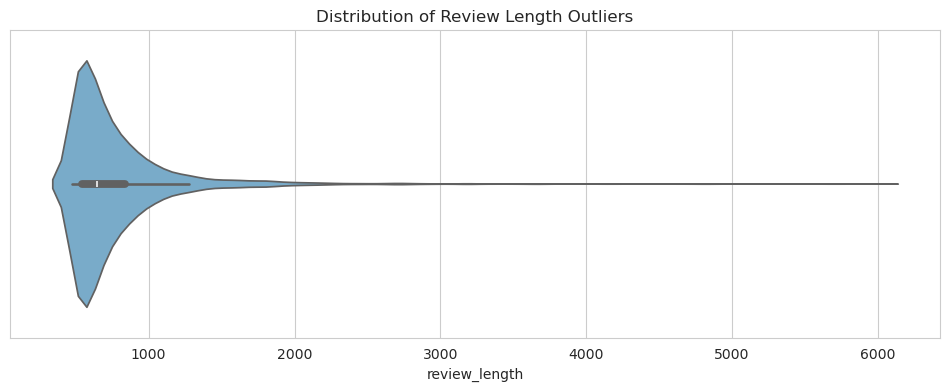

In [6]:
dqa.plot_validity()

### Balance

,count,mean,std,min,25%,50%,75%,max
quant_sentiment_score,86705.0,0.333954,0.527003,-1.0,0.0,0.4738,0.7942,1.0


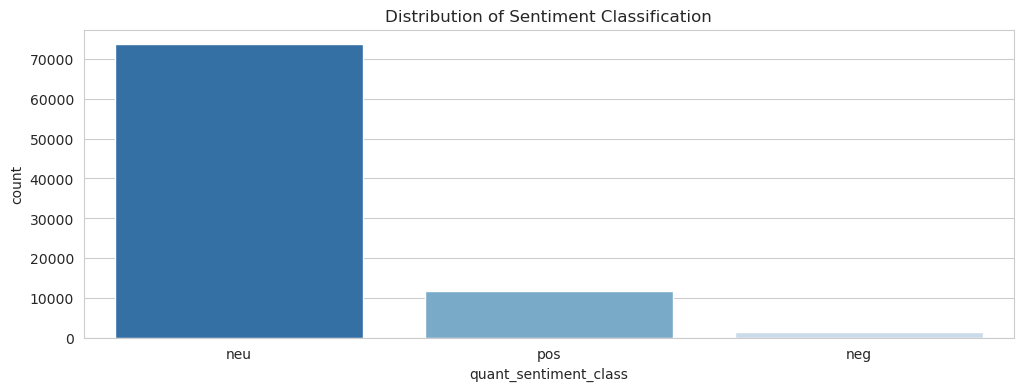

In [7]:
dqa.plot_balance()